#Quiz
>공공자전거 대여 이력 정보 데이터 중 이용거리에 대한 결측치를 처리하시오

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/1. 데이터 분석을 위한 기초 통계학/1. 데이터 클랜징/data/bicycle.csv', encoding='cp949')
df

>이용 거리는 출발지에서 도착지까지 이동한 경로에 대한 거리로 최단 경로로 이동할 수도 있고 경유를 하여 이동할 수도 있다. 이에 따라 이용 거리는 달라진다.

> 이용거리의 평균을 구하여 대표값으로 사용하기에는 출발지와 도착지가 모두 다름으로 대표값으로 사용할 수 없게 된다.

> 따라서 출발지가 같은 지역의 이용거리 평균을 이용하여 결측치를 대체할 것이다.(단, 같은 출발지의 도착지는 같다고 가정한다.)

In [ ]:
print(df[df['대여소번호']==646])
df[df['대여소번호']==646].describe()

> 첫 줄의 대여소 번호는 출발지를 뜻하는 것으로 출발지가 646인 모든 결과를 출력하는 코드이다.

> 출발지가 646인 값을 확인하면 반납대여소번호가 3번으로 도착지가 같고 이용 시간은 최소 5분에서 최대 30분이 소요되는 것을 볼 수 있으며 이용거리는 1060미터에서 최디 1420미터 이동하는 것을 알 수 있다.

> 따라서 같은 출발지이면 최대, 최소 이동거리의 차가 크지 않음으로 이의 평균 거리를 결측치로 대체하는 것은 타당하다고 판단할 수 있다.

In [5]:
import numpy as np

# df2 = df
# df2.replace(np.nan, 'test')

df2 = df
df3 = df2.replace({'이용거리':np.nan}, {'이용거리':'ex)대표값'})

> 부분 교체를 위해 replace 함수에 대한 사용법을 알아 보자
* replace(찾을 데이터, 변경할 데이터)

> NaN 값을 찾을 경우 numpy에서 지원하는 nan을 이용하면 된다.

> 특정 feature를 지정하려면 dict 형식을 이용하면 된다.

In [ ]:
df2 = df

# df2
# 대여소가 646번인 값에 대해 true, false로 반환
# df2['대여소번호']==646
# true인 값만 추출, 즉 대여소 번호가 646번인 값만 추출한다.
# df2[df2['대여소번호']==646]
# feature가 '이용거리'인 데이터 추출
# df2[df2['대여소번호']==646]['이용거리']
# 대여소번호가 646번인 이용거리의 평균
mean646 = df2[df2['대여소번호']==646]['이용거리'].mean()
# 대여소번호가 646번인 데이터 중 결측치를 평균으로 대체
df2[df2['대여소번호']==646].replace({'이용거리':np.nan}, {'이용거리':mean646})
# 대여소번호가 646번인 dataframe에 대여소번호가 646번인 결측치를 대체한 결과를 저장
df2[df2['대여소번호']==646] = df2[df2['대여소번호']==646].replace({'이용거리':np.nan}, {'이용거리':mean646})
df2
# mean646 = df2[]

> 결측치 처리 순서
1. 결측열 찾기
2. 대여소 번호 얻기
3. 대여소 번호와 column 명을 전달하여 변경하기

In [ ]:
df2 = df
def test(data_frame, rentNo):
  bool_rentNo = data_frame['대여소번호']==rentNo
  print(type(bool_rentNo))
  print(bool_rentNo)
  mean_distance = data_frame[bool_rentNo]['이용거리'].mean()
  data_frame[bool_rentNo] = data_frame[bool_rentNo].replace({'이용거리':np.nan}, {'이용거리':mean_distance})
  print(data_frame)

test(df2, 103)


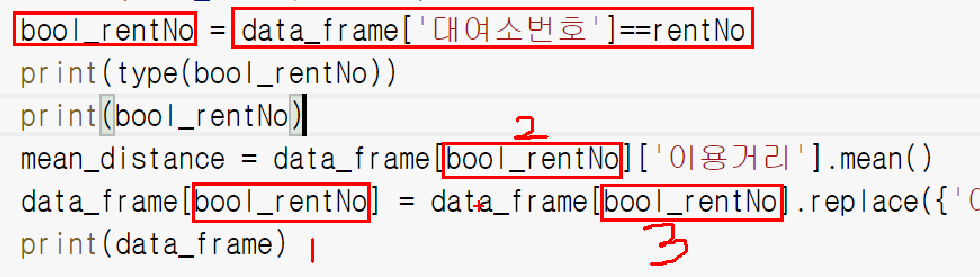

> data_frame['대여소번호']==rentNo 이 정보가 현재 1, 2, 3 세 곳에서 중복되게 사용되어 별도의 변수 처리를 하였다. 이는 추후 문제가 발생할 경우 한 곳을 수정하여 모든 곳에 적용할 수 있도록 하기 위함이다.

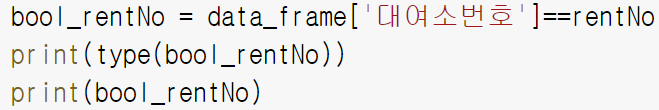

> 위의 코드를 실행해 보면 type은 Series이고 참 거짓의 결과를 출력하는 것을 볼 수 있다. 이를 이용하여 dataframe에서 참인 값만 얻을 수 있다.

>함수화 방법
1. 외부에서 전달되는 모든 값은 인자로 처리한다.
